In [1]:
%matplotlib notebook


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [9, 6]

In [3]:
# Obtener el json (solo los datos del sensor 4)
sensor_df = pd.read_json('test-arduino-19-oct.json')

sensordf2 = sensor_df.drop(columns=['nameSensors', 'sensor1', 'sensor2', 'sensor3', 'sensor5'])
sensordf2.dropna(subset = ["sensor4"], inplace=True)

In [4]:
sensordf2

,sensor4
1970-01-01T00:01:12Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:14:50Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:15:06Z,"{'humidity': 60, 'light': 91.79688, 'temperatu..."
2020-10-14T02:15:20Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:15:31Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
...,...
2020-10-19T19:54:10Z,"{'humidity': 56, 'light': 84.17969, 'temperatu..."
2020-10-19T19:54:21Z,"{'humidity': 56, 'light': 83.39844, 'temperatu..."
2020-10-19T19:54:32Z,"{'humidity': 55, 'light': 83.49609, 'temperatu..."
2020-10-19T19:54:44Z,"{'humidity': 55, 'light': 83.49609, 'temperatu..."


In [5]:
data = sensordf2['sensor4'].values.tolist()
df = pd.DataFrame(data,columns =['humidity', 'light','temperature', 'timestamp'])

In [6]:
df

,humidity,light,temperature,timestamp
0,60.0,91.69922,19.9,72
1,60.0,91.69922,19.9,1.60264e+09
2,60.0,91.79688,19.9,1.60264e+09
3,60.0,91.69922,19.9,1.60264e+09
4,60.0,91.69922,19.9,1.60264e+09
...,...,...,...,...
1072,56.0,84.17969,20.0,1603137250
1073,56.0,83.39844,20.1,1603137261
1074,55.0,83.49609,20.2,1603137272
1075,55.0,83.49609,20.2,1603137284


In [7]:
df['date'] = pd.to_datetime(df['timestamp'],unit='s', errors='coerce')

In [8]:
# Crear un DF a partir del json con hora-temp-hum-light
df

,humidity,light,temperature,timestamp,date
0,60.0,91.69922,19.9,72,1970-01-01 00:01:12
1,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
2,60.0,91.79688,19.9,1.60264e+09,2020-10-14 02:20:00
3,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
4,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
...,...,...,...,...,...
1072,56.0,84.17969,20.0,1603137250,2020-10-19 19:54:10
1073,56.0,83.39844,20.1,1603137261,2020-10-19 19:54:21
1074,55.0,83.49609,20.2,1603137272,2020-10-19 19:54:32
1075,55.0,83.49609,20.2,1603137284,2020-10-19 19:54:44


In [9]:
def promedio_dinamico(alpha, val_medio, val_nuevo):
    nuevo_medio = (1 - alpha) * val_medio + alpha * val_nuevo
    return nuevo_medio;

In [10]:
# Recorrer los datos y mostrar el promedio que se va obteniendo

df2 = df[df['date'] > '2020-10-19 00:00:00']

med_temperature = 20;
med_humidity = 50;
med_light = 50;
alpha = 0.1
med_temperature_arr = [];
med_humidity_arr = [];
med_light_arr = [];


for index, row in df2.iterrows():
    
    if not (math.isnan(row['temperature'])):
        med_temperature = promedio_dinamico(alpha, med_temperature, row['temperature'])
        med_temperature_arr.append(med_temperature);
    else:
        med_temperature_arr.append(med_temperature);
        
    if not (math.isnan(row['humidity'])):
        med_humidity = promedio_dinamico(alpha, med_humidity, row['humidity'])
        med_humidity_arr.append(med_humidity);
    else:
        med_humidity_arr.append(med_humidity);
        
    if not (math.isnan(row['light'])):
        med_light = promedio_dinamico(alpha, med_light, row['light'])
        med_light_arr.append(med_light);
    else:
        med_light_arr.append(med_light);
    
    print(row['humidity'], med_humidity , "----", row['light'], med_light ,"----",row['temperature'], med_temperature)

69.0 51.9 ---- 79.98047 52.998047 ---- 17.8 19.78
77.0 54.410000000000004 ---- 78.02734 55.500976300000005 ---- 17.7 19.572000000000003
72.0 56.169000000000004 ---- 78.02734 57.75361267000001 ---- 17.7 19.384800000000002
72.0 57.752100000000006 ---- 77.73438 59.75168940300001 ---- 17.9 19.236320000000003
73.0 59.27689000000001 ---- 77.73438 61.549958462700005 ---- 18.0 19.112688000000002
72.0 60.54920100000001 ---- 77.73438 63.168400616430006 ---- 18.0 19.001419200000004
71.0 61.594280900000015 ---- 78.32031 64.683591554787 ---- 18.0 18.901277280000006
71.0 62.53485281000002 ---- 78.32031 66.04726339930829 ---- 18.1 18.821149552000005
71.0 63.381367529000016 ---- 78.22266 67.26480305937747 ---- 18.1 18.749034596800005
71.0 64.14323077610001 ---- 77.63672 68.30199475343971 ---- 18.2 18.694131137120007
70.0 64.72890769849002 ---- 77.63672 69.23546727809574 ---- 18.3 18.65471802340801
70.0 65.25601692864102 ---- 77.63672 70.07559255028616 ---- 18.3 18.619246221067208
70.0 65.7304152357769

59.0 58.99912769591284 ---- 96.77734 96.89030953761475 ---- 19.5 19.532291232843175
59.0 58.99921492632156 ---- 96.77734 96.87901258385328 ---- 19.4 19.51906210955886
59.0 58.9992934336894 ---- 96.67969 96.85908032546796 ---- 19.4 19.507155898602974
59.0 58.99936409032046 ---- 96.48438 96.82161029292116 ---- 19.4 19.496440308742677
59.0 58.99942768128842 ---- 96.48438 96.78788726362905 ---- 19.5 19.49679627786841
59.0 58.99948491315958 ---- 97.26563 96.83566153726615 ---- 19.4 19.48711665008157
59.0 58.99953642184362 ---- 96.48438 96.80053338353953 ---- 19.5 19.488404985073412
59.0 58.99958277965926 ---- 96.67969 96.78844904518557 ---- 19.5 19.48956448656607
59.0 58.99962450169333 ---- 96.77734 96.78733814066702 ---- 19.4 19.480608037909466
59.0 58.999662051524 ---- 96.77734 96.78633832660032 ---- 19.5 19.48254723411852
59.0 58.9996958463716 ---- 96.77734 96.78543849394029 ---- 19.4 19.474292510706672
59.0 58.99972626173444 ---- 97.36328 96.84322264454626 ---- 19.5 19.476863259636005
5

83.0 76.27326495793822 ---- 14.64844 17.439735354846338 ---- 7.9 8.355472108467897
82.0 76.8459384621444 ---- 15.03906 17.199667819361704 ---- 7.9 8.309924897621107
81.0 77.26134461592996 ---- 14.74609 16.954310037425532 ---- 7.9 8.268932407858998
79.0 77.43521015433697 ---- 15.03906 16.76278503368298 ---- 7.8 8.222039167073097
78.0 77.49168913890327 ---- 14.64844 16.551350530314682 ---- 7.8 8.179835250365787
77.0 77.44252022501294 ---- 14.64844 16.361059477283213 ---- 7.8 8.141851725329209
76.0 77.29826820251165 ---- 14.64844 16.18979752955489 ---- 7.7 8.097666552796289
74.0 76.9684413822605 ---- 15.03906 16.074723776599402 ---- 7.7 8.057899897516661
72.0 76.47159724403446 ---- 14.64844 15.932095398939463 ---- 7.7 8.022109907764994
72.0 76.02443751963102 ---- 15.03906 15.842791859045517 ---- 7.6 7.979898916988494
72.0 75.62199376766793 ---- 14.74609 15.733121673140968 ---- 7.6 7.941909025289645
71.0 75.15979439090114 ---- 14.74609 15.634418505826872 ---- 7.5 7.897718122760681
70.0 74.

<ipython-input-11-02b55a11de9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['temperature_med'] = med_temperature_arr


<IPython.core.display.Javascript object>


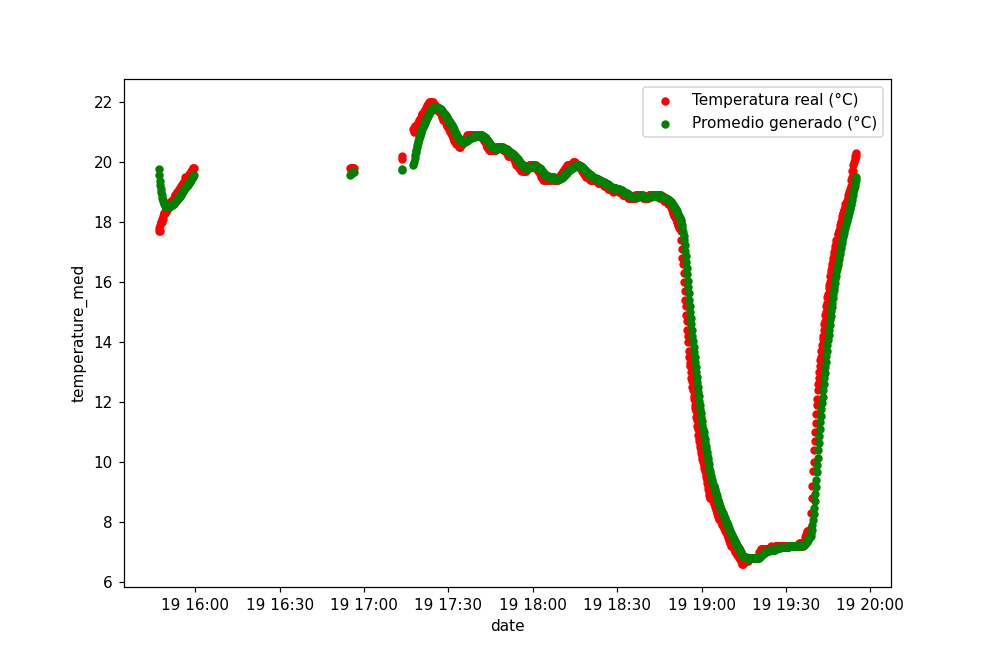

In [11]:
# Crear un array y graficar el comportamiento (temperatura)

df2['temperature_med'] = med_temperature_arr

ax1 = df2.plot(kind='scatter', x='date', y='temperature', color='r', label="Temperatura real (°C)")    
ax2 = df2.plot(kind='scatter', x='date', y='temperature_med', color='g', ax=ax1, label="Promedio generado (°C)")    

ax1.legend()
ax2.legend()

plt.show()

<ipython-input-12-4f08282c4d86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['humidity_med'] = med_humidity_arr


<IPython.core.display.Javascript object>


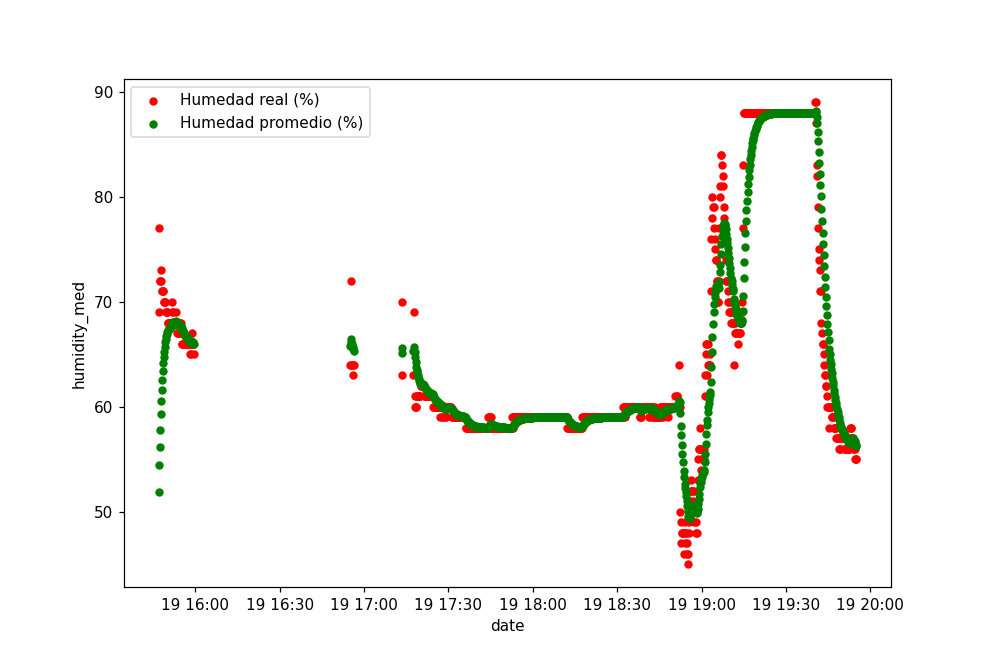

In [12]:
# Crear un array y graficar el comportamiento (humedad)

df2['humidity_med'] = med_humidity_arr

ax1 = df2.plot(kind='scatter', x='date', y='humidity', color='r', label="Humedad real (%)")    
ax2 = df2.plot(kind='scatter', x='date', y='humidity_med', color='g', ax=ax1, label="Humedad promedio (%)")    

ax1.legend()
ax2.legend()

plt.show()

<ipython-input-13-c29da96ef2cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['light_med'] = med_light_arr


<IPython.core.display.Javascript object>


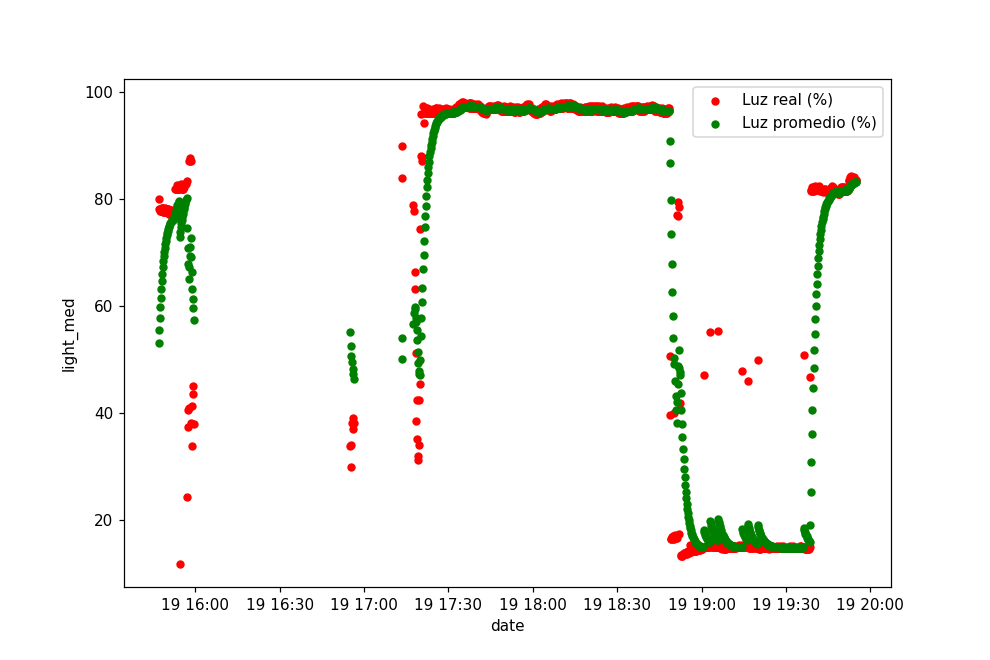

In [13]:
# Crear un array y graficar el comportamiento (luz)

df2['light_med'] = med_light_arr

ax1 = df2.plot(kind='scatter', x='date', y='light', color='r', label="Luz real (%)")    
ax2 = df2.plot(kind='scatter', x='date', y='light_med', color='g', ax=ax1, label="Luz promedio (%)")    

ax1.legend()
ax2.legend()

plt.show()

In [14]:
df2

,humidity,light,temperature,timestamp,date,temperature_med,humidity_med,light_med
168,69.0,79.98047,17.8,1603122420,2020-10-19 15:47:00,19.780000,51.900000,52.998047
169,77.0,78.02734,17.7,1603122431,2020-10-19 15:47:11,19.572000,54.410000,55.500976
170,72.0,78.02734,17.7,1603122442,2020-10-19 15:47:22,19.384800,56.169000,57.753613
171,72.0,77.73438,17.9,1603122453,2020-10-19 15:47:33,19.236320,57.752100,59.751689
172,73.0,77.73438,18.0,1603122464,2020-10-19 15:47:44,19.112688,59.276890,61.549958
...,...,...,...,...,...,...,...,...
1072,56.0,84.17969,20.0,1603137250,2020-10-19 19:54:10,19.119506,56.795889,83.060129
1073,56.0,83.39844,20.1,1603137261,2020-10-19 19:54:21,19.217556,56.716300,83.093960
1074,55.0,83.49609,20.2,1603137272,2020-10-19 19:54:32,19.315800,56.544670,83.134173
1075,55.0,83.49609,20.2,1603137284,2020-10-19 19:54:44,19.404220,56.390203,83.170365


In [15]:
def calc_dif_porcentual(val_1, val_2):
    return (abs(val_1 - val_2)/val_1) * 100

In [16]:
for index, row in df2.iterrows(): 
    diferencia_porcentual = calc_dif_porcentual(row['temperature_med'],row['temperature'])
    print("diferencia", diferencia_porcentual)

diferencia 10.01011122345804
diferencia 9.564684242795847
diferencia 8.691345796706711
diferencia 6.946858858659058
diferencia 5.8217242912143075
diferencia 5.270233709701031
diferencia 4.768340608143311
diferencia 3.831591423295244
diferencia 3.46169608599889
diferencia 2.6432420608135976
diferencia 1.9014922818072437
diferencia 1.714603358679407
diferencia 1.545793445444845
diferencia 1.3933679599599802
diferencia 0.7697382820468062
diferencia 0.6932981119397525
diferencia 0.6244011969166887
diferencia 0.07589117760415094
diferencia 0.06830724376091142
diferencia 0.06148071896328477
diferencia 0.430648580714411
diferencia 0.3874168821125529
diferencia 0.3485401635578353
diferencia 0.31357685307439326
diferencia 0.7669533105629909
diferencia 0.6897289895747326
diferencia 0.6203282322524097
diferencia 0.5579492973258683
diferencia 0.5018743471539258
diferencia 0.9344146194428112
diferencia 0.8401880734795855
diferencia 1.2372117362351942
diferencia 1.1121146413253882
diferencia 0.99979

diferencia 6.277387156920786
diferencia 5.614404649587621
diferencia 5.558494654808462
diferencia 4.974991724419715
diferencia 4.983515131385786
diferencia 4.988178478397794
diferencia 4.989419613089756
diferencia 4.468184006862056
diferencia 4.52088256662992
diferencia 4.565236251591322
diferencia 4.602139523999721
diferencia 4.12295117504156
diferencia 4.203015892916576
diferencia 3.766882038550142
diferencia 3.8809415283296502
diferencia 3.980530768825473
diferencia 3.568274067226719
diferencia 3.697331634604938
diferencia 3.3153405576212567
diferencia 3.467633893850958
diferencia 3.6017225852732584
diferencia 3.229917061516908
diferencia 3.3857115794615416
diferencia 3.0368584945452217
diferencia 3.2097537597575956
diferencia 3.36249730152699
diferencia 3.9776136011267003
diferencia 4.043969829292158
diferencia 4.576587383286728
diferencia 4.100163886645021
diferencia 4.617503955517842
diferencia 4.605212429289612
diferencia 4.591866455985338
diferencia 4.5775998844938295
diferenci

In [17]:
# Calcular diferencia porcentual
for index, row in df2.iterrows(): 
    diferencia_porcentual = calc_dif_porcentual(row['humidity_med'],row['humidity'])
    print("diferencia", diferencia_porcentual)

diferencia 32.94797687861272
diferencia 41.51810328983642
diferencia 28.18458580355711
diferencia 24.67079119200859
diferencia 23.150860309979134
diferencia 18.91156086436217
diferencia 15.270442259518259
diferencia 13.536686838809207
diferencia 12.020303076474477
diferencia 10.689778392726119
diferencia 8.143335781383723
diferencia 7.26980176639748
diferencia 6.4955998663753425
diferencia 5.80831141290032
diferencia 3.850542822111041
diferencia 3.452195712478729
diferencia 3.0962871520001056
diferencia 2.7780567752992047
diferencia 1.1581754166619729
diferencia 1.0411520382999961
diferencia 0.9360622513490183
diferencia 0.8416681724097682
diferencia 0.7568643265542876
diferencia 0.680662724564221
diferencia 0.6121797641615953
diferencia 1.878663844862849
diferencia 3.009552050109333
diferencia 1.3820627242080614
diferencia 0.07852513012929756
diferencia 0.07067816712863262
diferencia 0.0636148465965394
diferencia 0.057257004332445176
diferencia 0.051534254596239344
diferencia 1.274658

diferencia 0.053186510709905745
diferencia 0.04786531384988384
diferencia 0.043076720584149894
diferencia 0.03876737855420114
diferencia 0.03488928813253689
diferencia 0.03139926382132421
diferencia 0.02825845014465569
diferencia 0.025431886464489562
diferencia 0.022888115730086
diferencia 0.020598832688612123
diferencia 0.018538567546897314
diferencia 0.01668440148730122
diferencia 0.015015710810424524
diferencia 0.01351393680801144
diferencia 0.012162378765592223
diferencia 0.010946007759538249
diferencia 0.009851299151189883
diferencia 0.008866081893642247
diferencia 0.007979402958235522
diferencia 0.007181405359079986
diferencia 0.006463218408178265
diferencia 0.0058168589717340685
diferencia 0.005235142622473125
diferencia 0.004711603694312105
diferencia 0.004240423345681777
diferencia 0.003816364828109882
diferencia 0.0034347152371760814
diferencia 0.0030912330959542616
diferencia 0.0027821011862343673
diferencia 0.002503884101547184
diferencia 0.002253490048916968
diferencia 0.0

In [18]:
# Calcular diferencia porcentual
for index, row in df2.iterrows(): 
    calc_dif_porcentual(row['light_med'],row['light'])
    print("diferencia", diferencia_porcentual)

diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.224278439307921
diferencia 2.2

In [19]:
""" Definir funciones para reutilizar los calculos de promedios """

' Definir funciones para reutilizar los calculos de promedios '

In [20]:
# Definir una función para la aceleración - desaceleración

default_time = 30
lower_time = 5     #Tiempo minimo para el intervalo
upper_time = 150   #Tiempo máximo para el intervalo 
time = default_time

# Recorrer los datos y mostrar el promedio que se va obteniendo

df2 = df[df['date'] > '2020-10-19 00:00:00']

med_temperature = 20;
med_humidity = 50;
med_light = 50;
alpha = 0.01

med_total_arr = []
val_actual_arr = []
diff_arr = []
time_arr = []

for index, row in df2.iterrows():
    
    # Obtener los promedios dinamicos
    
    if not (math.isnan(row['temperature'])):
        med_temperature = promedio_dinamico(alpha, med_temperature, row['temperature'])
        
    if not (math.isnan(row['humidity'])):
        med_humidity = promedio_dinamico(alpha, med_humidity, row['humidity'])
        
    if not (math.isnan(row['light'])):
        med_light = promedio_dinamico(alpha, med_light, row['light'])
        
    # Aplicar una ponderación de 1/3 a cada variable   
    med_total = med_temperature * .33 + med_humidity * .33 + med_light * .33
    val_actual = row['temperature'] * .33 + row['humidity'] * .33 + row['light'] * .33
    
    med_total_arr.append(med_total)
    val_actual_arr.append(val_actual)
    
    #Calcular la diferencia porcentual
    diff = calc_dif_porcentual(med_total, val_actual)
    diff_arr.append(diff)
    
    
    # Modelar el comportamiento del "algoritmo adaptativo"
    
    """ OPCION 1
if (diferencia > 100):
    acelerar(10 %)
else (diferencia 10 - 100 ):
    acelerar 0.1 * diferencia:
else:
    desacelerar diferencia 
    """
    
    if(diff > 100 and time>lower_time):
        time = time * 0.9 #Reducir tiempo
    elif(diff <= 100 and diff>10 and time>lower_time):
        time = time - (.1*diff) #Reducir tiempo
    elif(diff <= 10 and  time < upper_time ):
        time = time + (0.1*diff) # Aumentar tiempo
        print("entroaqui")
    else:
        # Mantiene la velocidad de actualización tal como está
        time = time
        
    time_arr.append(time)
        
    print(med_total, val_actual, diff, time)
    


39.754375550999995 55.0375551 38.44401864492515 26.155598135507486
39.92683201749 57.000022200000004 42.761194214033985 21.87947871410409
40.0810639193151 55.3500222 38.095192062321416 18.069959507871946
40.23344673412195 55.3193454 37.49591419689062 14.320368088182885
40.38793572078073 55.6823454 37.868758098844516 10.533492278298434
40.53757981757292 55.352345400000004 36.54575741594946 6.878916536703487
40.684361042397185 55.215702300000004 35.71726551747907 3.30718998495558
40.83000445497321 55.248702300000005 35.313975684052494 3.30718998495558
40.97386918842349 55.2164778 34.76022375646313 3.30718998495558
41.11469167253925 55.0561176 33.90862331766508 3.30718998495558
41.25113593181386 54.7591176 32.74572048273818 3.30718998495558
41.38621574849572 54.7591176 32.31245381982128 3.30718998495558
41.521878369010764 54.952477800000004 32.34583780538447 3.30718998495558
41.654250761320654 54.7591176 31.46105523244288 3.30718998495558
41.78232942970745 54.4621176 30.347250484500638 3.

entroaqui
57.62974028054425 58.069430100000005 0.7629564480341703 87.24577980401172
entroaqui
57.631559053738805 57.811617600000005 0.312430462089884 87.2770228502207
entroaqui
57.633681917201415 57.843845400000006 0.36465392424610343 87.31348824264532
entroaqui
57.6364280750294 57.908297700000006 0.4716975601206476 87.36065799865739
entroaqui
57.63946901627911 57.940522200000004 0.5223038811059647 87.41288838676799
entroaqui
57.64247954811631 57.940522200000004 0.517053836372364 87.46459377040523
entroaqui
57.64739357663515 58.133882400000005 0.8439042828850953 87.54898419869374
entroaqui
57.6503248628688 57.940522200000004 0.5033750248961963 87.59932170118337
entroaqui
57.65354911424012 57.972750000000005 0.5536534882308619 87.65468705000646
entroaqui
57.65674112309772 57.972750000000005 0.5480866083423023 87.70949571084068
entroaqui
57.66023121186673 58.00575 0.5992324013819768 87.76941895097889
entroaqui
57.66038639974806 57.67575 0.026644983169944302 87.77208344929588
entroaqui
57

<IPython.core.display.Javascript object>


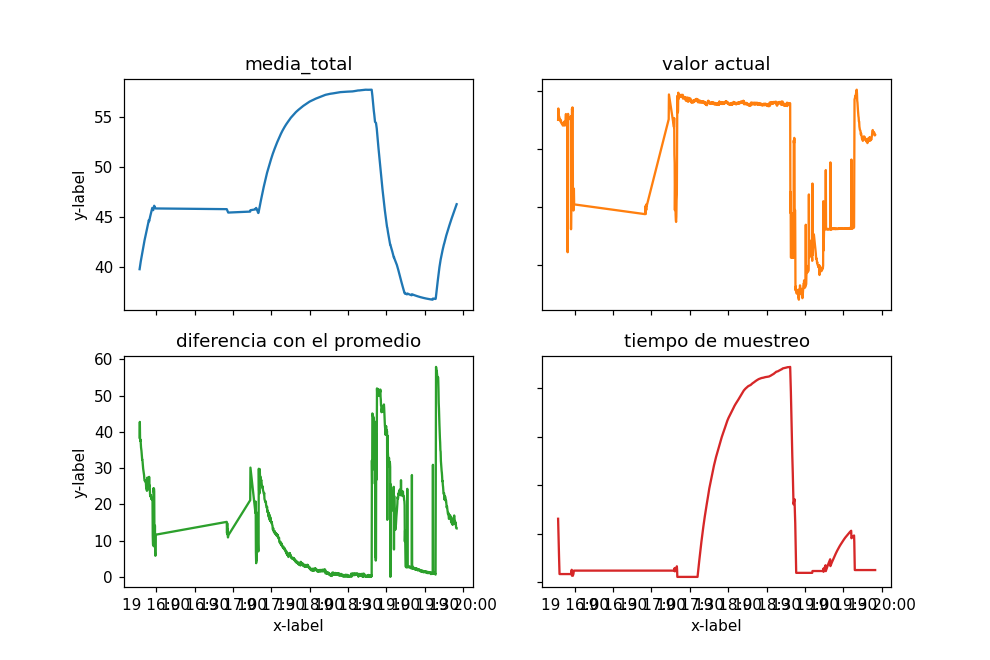

In [21]:
# Graficar los arreglos para ver el comportamiento del algoritmo
import numpy as np

x = df2['date'].to_numpy()

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, med_total_arr)
axs[0, 0].set_title('media_total')
axs[0, 1].plot(x, val_actual_arr, 'tab:orange')
axs[0, 1].set_title('valor actual')

axs[1, 0].plot(x, diff_arr, 'tab:green')
axs[1, 0].set_title('diferencia con el promedio')

axs[1, 1].plot(x, time_arr, 'tab:red')
axs[1, 1].set_title('tiempo de muestreo')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<IPython.core.display.Javascript object>


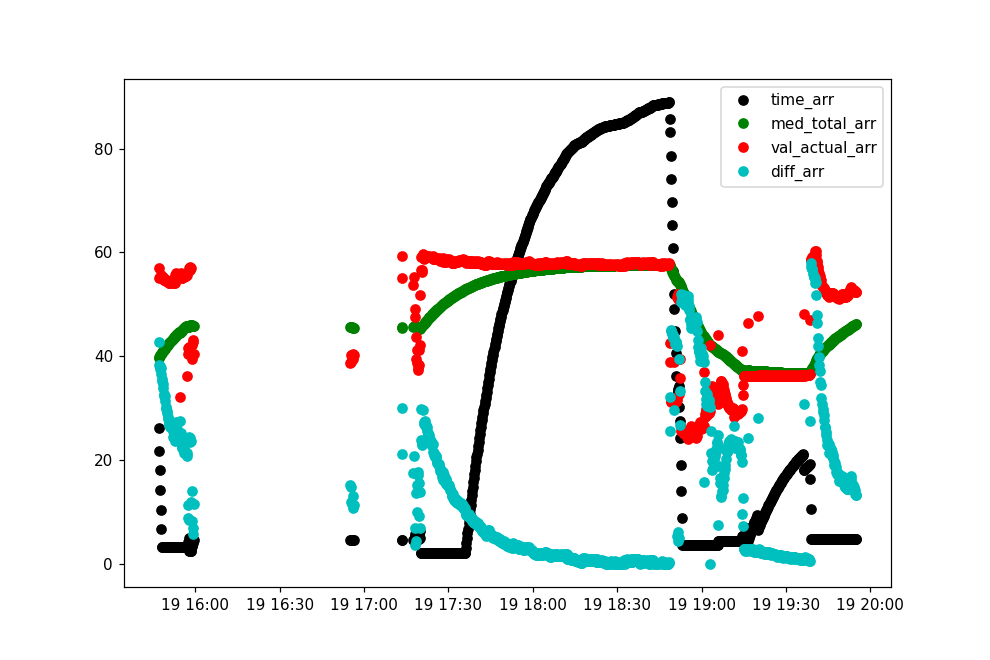

In [22]:
# Mostrar solo el tiempo de muestreo

x = df2['date'].to_numpy()

fig, ax = plt.subplots()
ax.plot(x,time_arr,'o', color="k", label="time_arr")
ax.plot(x,med_total_arr,'o', color='g', label="med_total_arr")
ax.plot(x,val_actual_arr,'o', color='r', label="val_actual_arr")
ax.plot(x,diff_arr,'o', color='c', label="diff_arr")
ax.legend()
plt.show()

In [23]:
time_arr

[26.155598135507486,
 21.87947871410409,
 18.069959507871946,
 14.320368088182885,
 10.533492278298434,
 6.878916536703487,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3.30718998495558,
 3

In [24]:
##REVISAR ARRIBA EN LAPSOS MAS ACOTADOS (tal vez se puede usar un widget)


""" OPCION 2
Funcion polinomica inversa
"""

' OPCION 2\nFuncion polinomica inversa\n'